In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

https://www.youtube.com/watch?v=3tKi_J3opy4&list=PL4GjoPPG4VqNia7asx4-nuLZ31M-JPu94&index=3

# Import data

In [164]:
path = 'C:/Users/84393/OneDrive - CÔNG TY TNHH OFFICIENCE/PYTHON/15_Feature_Selection/3_ANOVA/'
file = 'loan_data_sample.csv'
df = pd.read_csv(path + file)
print(df.shape)
df.head()

(1000, 5)


,age,gender,education,income,loan_amount
0,50+,Male,PhD,<20k,30925.13246
1,30-40,Male,PostGraduate,60k-80k,37081.63067
2,20-30,Male,HighSchool,80k+,25218.16445
3,<20,Female,PostGraduate,20k-40k,22508.06299
4,50+,Male,PostGraduate,60k-80k,53153.71567


In [165]:
for col in df.columns:
    if df[col].dtypes == 'object':
        print(col, df[col].unique())

age ['50+' '30-40' '20-30' '<20' '40-50']
gender ['Male' 'Female']
education ['PhD' 'PostGraduate' 'HighSchool' 'UnderGraduate']
income ['<20k' '60k-80k' '80k+' '20k-40k' '40k-60k']


In [166]:
age = ['<20', '20-30', '30-40',  '40-50', '50+']
edu = ['HighSchool', 'UnderGraduate', 'PostGraduate', 'PhD']
gender = ['Male', 'Female']
income = ['<20k', '20k-40k', '40k-60k', '60k-80k', '80k+' ]

In [167]:
# create a customer label encoder list to label ordinal variables
def customlabelencoder(x, labellist):
    for index, label in enumerate(labellist):
        # print(f"Index: {index}, Label: {label}")
        if x == label:
            x = index
            return x

customlabelencoder('PostGraduate', edu)

2

In [168]:
df['age_num']= df.age.apply(lambda x: customlabelencoder(x, age))
df['gender_num'] = df.gender.apply(lambda x: customlabelencoder(x, gender))
df['education_num'] = df.education.apply(lambda x: customlabelencoder(x, edu))

df['income_num'] = df.income.apply(lambda x: customlabelencoder(x, income))
df

,age,gender,education,income,loan_amount,age_num,gender_num,education_num,income_num
0,50+,Male,PhD,<20k,30925.132460,4,0,3,0
1,30-40,Male,PostGraduate,60k-80k,37081.630670,2,0,2,3
2,20-30,Male,HighSchool,80k+,25218.164450,1,0,0,4
3,<20,Female,PostGraduate,20k-40k,22508.062990,0,1,2,1
4,50+,Male,PostGraduate,60k-80k,53153.715670,4,0,2,3
...,...,...,...,...,...,...,...,...,...
995,50+,Male,PhD,80k+,47243.343080,4,0,3,4
996,40-50,Female,HighSchool,40k-60k,21257.653530,3,1,0,2
997,<20,Female,HighSchool,40k-60k,6277.322031,0,1,0,2
998,50+,Female,UnderGraduate,20k-40k,22105.126800,4,1,1,1


# ANOVA test

In [169]:
X  = df[['age_num', 'gender_num','education_num',  'income_num']]
y = df.loan_amount

In [53]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

In [170]:
kbest = SelectKBest(score_func=f_regression, k =2)
X_anova = kbest.fit(X, y)
X_anova

SelectKBest(k=2, score_func=<function f_regression at 0x0000029EDC5B6DE0>)

In [171]:
print(X_anova.scores_, X_anova.pvalues_)

[354.81089937   1.70391785 330.63184487 311.05488666] [5.89526497e-68 1.92077255e-01 4.90016647e-64 8.26254479e-61]


In [172]:
pd.DataFrame(zip(X.columns, X_anova.scores_, X_anova.pvalues_), columns=['feature', 'anova_score', 'pvalue']).sort_values('anova_score', ascending=False)


,feature,anova_score,pvalue
0,age_num,354.810899,5.895265e-68
2,education_num,330.631845,4.900166e-64
3,income_num,311.054887,8.262545e-61
1,gender_num,1.703918,1.920773e-01


In [155]:
df.columns

Index(['age', 'gender', 'education', 'income', 'loan_amount', 'age_num',
       'education_num', 'gender_num', 'income_num'],
      dtype='object')

In [186]:
# Get out the k feature names from SelectKBest
kbest = SelectKBest(score_func=f_regression, k =2)
kbest.fit_transform(X, y)
kbest.get_feature_names_out()

array(['age_num', 'education_num'], dtype=object)

# Plot

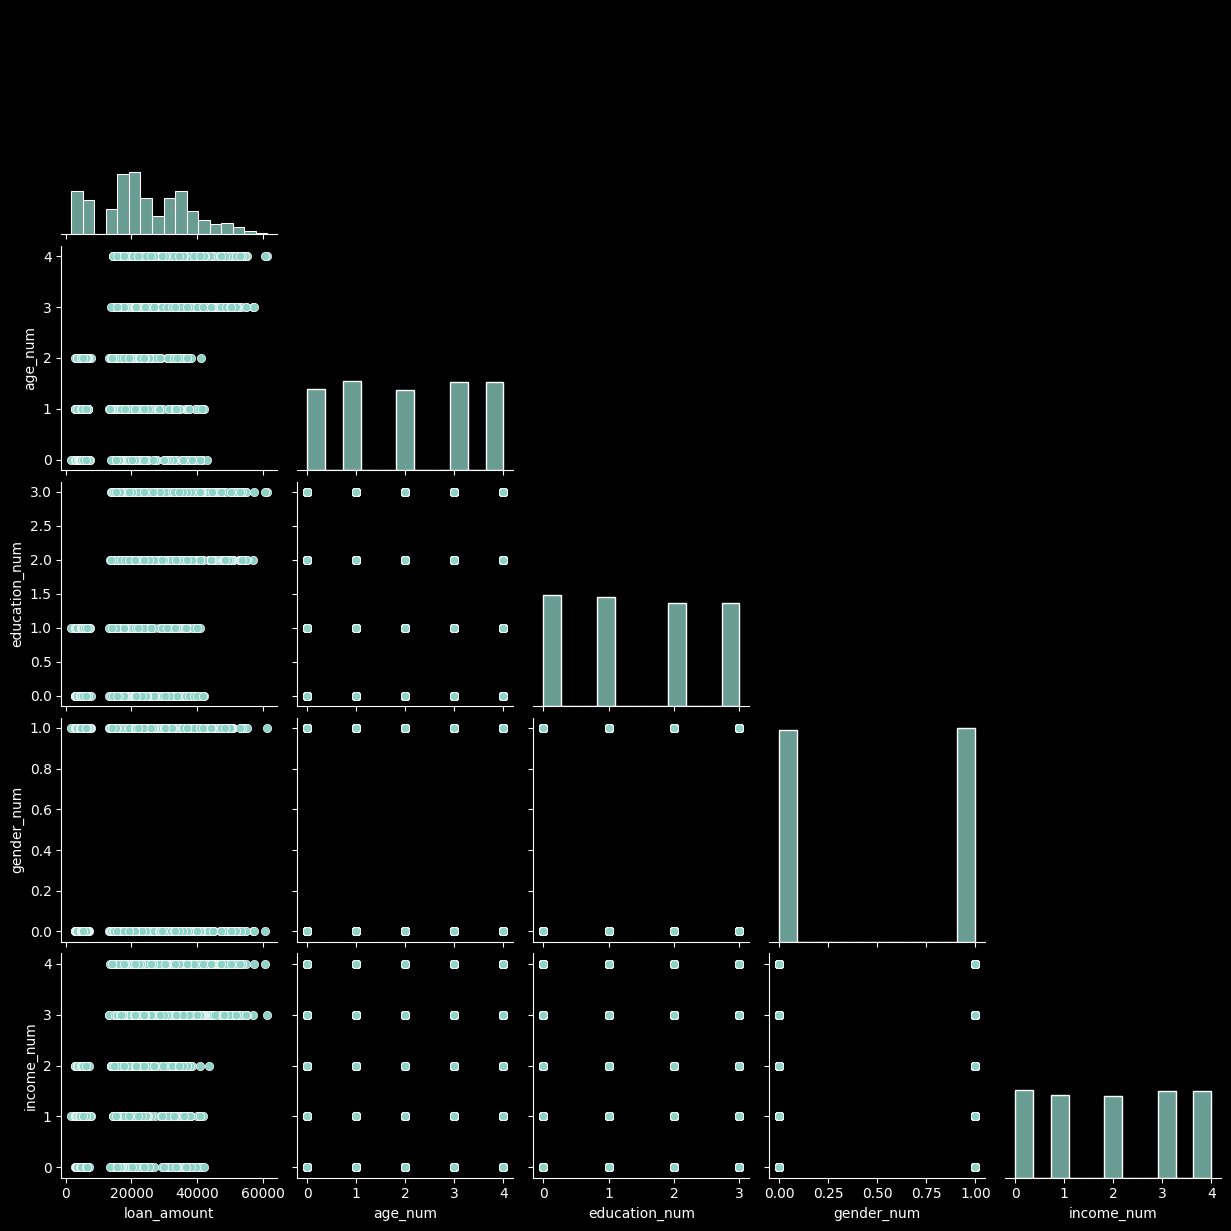

In [72]:
sns.pairplot(df, corner = True)

IndexError: index 3 is out of bounds for axis 0 with size 3

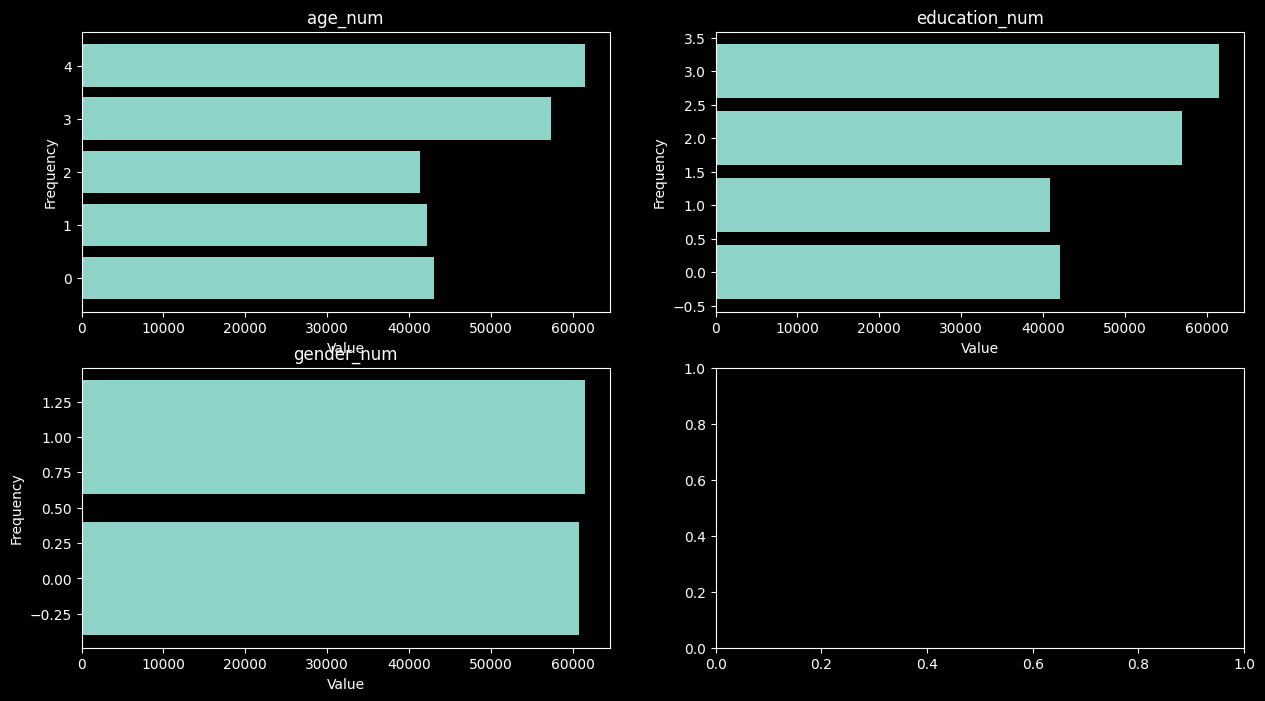

In [92]:
fig , axes = plt.subplots(2,2, figsize=(15,8))

axes = axes.flatten()
for i, ax in enumerate(axes):
    column_name = df[['age_num','education_num','gender_num']].columns[i]
    # ax.hist(df[column_name], bins=10, color='skyblue', edgecolor='black')
    ax.barh(df[column_name], df['loan_amount'])
    ax.set_title(f'{column_name}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# Model

In [122]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

In [114]:
X

,age_num,education_num,gender_num,income_num
0,4,3,0,0
1,2,2,0,3
2,1,0,0,4
3,0,2,1,1
4,4,2,0,3
...,...,...,...,...
995,4,3,0,4
996,3,0,1,2
997,0,0,1,2
998,4,1,1,1


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape)
X_train.head()

(800, 4)


,age_num,education_num,gender_num,income_num
188,3,0,0,0
194,3,1,1,3
225,1,0,1,0
580,2,1,1,3
428,4,2,0,4


In [124]:
pipe = Pipeline([
        ('Kbest', SelectKBest(score_func=f_classif, k=3)),
        ('model', RandomForestRegressor())
    ])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


0.5720231611797384

In [149]:
models = [LinearRegression(), BaggingRegressor(),RandomForestRegressor(), DecisionTreeRegressor()]

scores = []
for m in models:
    pipe = Pipeline([
        ('Kbest', SelectKBest(score_func=f_classif, k=3)),
        ('model', m)
    ])
    clf = cross_val_score(pipe, X, y, cv=5)
    # clf.fit(X_train, y_train)
    # score=clf.score(X_test, y_test)
    # avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)
    scores.append({
        'model': m,
        'scores': clf
    })
scores


c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)
c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)
c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)
c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)
c:\Users\84393\miniconda3\envs\venv_ds\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)
c:\Users\84393\miniconda3\envs\venv_ds\L

[{'model': LinearRegression(),
  'scores': array([0.55519557, 0.49408534, 0.49444084, 0.48891464, 0.43389734])},
 {'model': BaggingRegressor(),
  'scores': array([0.65772226, 0.60499707, 0.60832589, 0.58191762, 0.58612902])},
 {'model': RandomForestRegressor(),
  'scores': array([0.65432702, 0.60900999, 0.59810935, 0.58447332, 0.59505686])},
 {'model': DecisionTreeRegressor(),
  'scores': array([0.65213885, 0.6111331 , 0.6005949 , 0.5839137 , 0.59479913])}]